Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

Import File


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataset = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/QC CAT FINAL.xlsx")

DATA ANALYSIS

In [5]:
dataset.head(5)

,SKU,Description,Ecosystem,Default QC CAT.,QC_CAT,Delivered,Doorstep Replacements,Doorstep Replacements %,Doorstep Repairs,Doorstep Repairs %,FC/DC Rejects,FC/DC Rejects %,Delivery Check,Reject Check,Movement,Default Move,Current Move,Int. Move,Final Move
0,ACBNRC51BE10003,Dining Bench upholstery Cotton fabric (Colour ...,JAIPUR/JODHPUR,C,B,40,0,0.0,0,0.0,0,0.0,1,0,-1,B,A,A,A
1,ACBNRC51FR10004,Latte Bench Upholstery Cotton Fabric Colour - ...,JAIPUR/JODHPUR,C,A+,3,0,0.0,0,0.0,0,0.0,0,0,0,C,A+,A+,A+
2,ACBNRC51OL10003,Dining Bench upholstery Cotton fabric (Colour ...,JAIPUR/JODHPUR,C,A+,18,0,0.0,0,0.0,0,0.0,1,0,-1,B,A+,A+,A+
3,ACCHRC51BE10003,Dining Chairs upholstery Cotton fabric Colour ...,JAIPUR/JODHPUR,C,A+,154,0,0.0,0,0.0,0,0.0,1,0,-1,B,A+,A+,A+
4,ACCHRC51OL10003,Dining Chairs upholstery Cotton fabric Colour ...,JAIPUR/JODHPUR,C,A+,58,0,0.0,0,0.0,0,0.0,1,0,-1,B,A+,A+,A+


In [6]:
dataset.shape

(9263, 19)

In [7]:
dataset.Ecosystem.unique()

array(['JAIPUR/JODHPUR', 'DOM-UPHOLSTERY', 'MALAYSIA', 'CHINA', 'DOM-E/W',
       'IMPORT', 'MTO-SOFA', 'MTS-SOFA', 'VIETNAM', 'DOMESTIC-REST',
       'MATTRESS', 'MBI-J&J', 'DECOR', 'VMI-FURNITURE', 'METAL/PLASTIC',
       'NOT_REQUIRED', 'INSTITUTIONAL BUSINESS', 'VMI-FURNITURES',
       'VMI-DECOR', 'UL-DECOR', 'KITCHEN', 'RAW MATERIAL', 'VMI-MATTRESS'],
      dtype=object)

In [8]:
dataset.dtypes

SKU                         object
Description                 object
Ecosystem                   object
Default  QC CAT.            object
QC_CAT                      object
Delivered                    int64
Doorstep Replacements        int64
Doorstep Replacements %    float64
Doorstep Repairs             int64
Doorstep Repairs %         float64
FC/DC Rejects                int64
FC/DC Rejects %            float64
Delivery Check               int64
Reject Check                 int64
Movement                     int64
Default Move                object
Current Move                object
Int. Move                   object
Final Move                  object
dtype: object

In [9]:
dataset.describe(include="all")

,SKU,Description,Ecosystem,Default QC CAT.,QC_CAT,Delivered,Doorstep Replacements,Doorstep Replacements %,Doorstep Repairs,Doorstep Repairs %,FC/DC Rejects,FC/DC Rejects %,Delivery Check,Reject Check,Movement,Default Move,Current Move,Int. Move,Final Move
count,9263,9263,9263,9263,9174,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.00000,9263.000000,9263.000000,9263,9195,9263,9263
unique,9263,8383,23,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,6,5,4
top,ACBNRC51BE10003,"Apollo Sofa (Sofa Size: Compact, Material: Lea...",MTO-SOFA,A+,A+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A+,A,A,A
freq,1,22,3824,7673,8337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3970,4370,4431,4431
mean,NaN,NaN,NaN,NaN,NaN,61.765303,2.884703,0.045043,2.829105,0.044243,0.156321,0.007612,0.59322,0.548850,0.493685,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,67.399206,3.580352,0.091793,3.544584,0.091388,1.463942,0.156079,0.49126,0.497635,0.591214,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,33.000000,1.000000,0.007634,1.000000,0.005319,0.000000,0.000000,1.00000,1.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,117.000000,6.000000,0.054945,6.000000,0.053191,0.000000,0.000000,1.00000,1.000000,1.000000,NaN,NaN,NaN,NaN


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9263 entries, 0 to 9262
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SKU                      9263 non-null   object 
 1   Description              9263 non-null   object 
 2   Ecosystem                9263 non-null   object 
 3   Default  QC CAT.         9263 non-null   object 
 4   QC_CAT                   9174 non-null   object 
 5   Delivered                9263 non-null   int64  
 6   Doorstep Replacements    9263 non-null   int64  
 7   Doorstep Replacements %  9263 non-null   float64
 8   Doorstep Repairs         9263 non-null   int64  
 9   Doorstep Repairs %       9263 non-null   float64
 10  FC/DC Rejects            9263 non-null   int64  
 11  FC/DC Rejects %          9263 non-null   float64
 12  Delivery Check           9263 non-null   int64  
 13  Reject Check             9263 non-null   int64  
 14  Movement                

In [11]:
dataset.groupby('Ecosystem')['Doorstep Repairs'].sum().sort_values(ascending=False)

Ecosystem
MTO-SOFA                  17230
IMPORT                     3819
JAIPUR/JODHPUR             2245
CHINA                       668
MATTRESS                    523
MALAYSIA                    504
MTS-SOFA                    334
DOM-UPHOLSTERY              320
DOM-E/W                     261
MBI-J&J                     214
DOMESTIC-REST                49
VIETNAM                      39
KITCHEN                       0
DECOR                         0
METAL/PLASTIC                 0
INSTITUTIONAL BUSINESS        0
NOT_REQUIRED                  0
RAW MATERIAL                  0
UL-DECOR                      0
VMI-DECOR                     0
VMI-FURNITURE                 0
VMI-FURNITURES                0
VMI-MATTRESS                  0
Name: Doorstep Repairs, dtype: int64

<Axes: ylabel='Doorstep Repairs'>

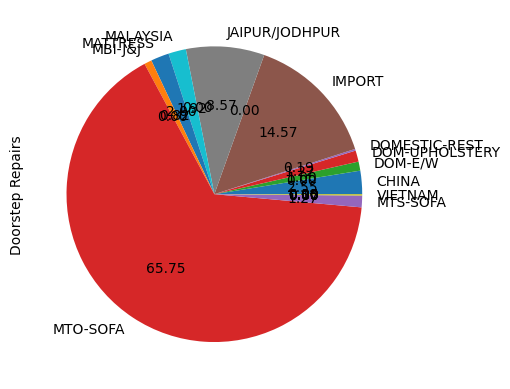

In [17]:
dataset.groupby('Ecosystem')['Doorstep Repairs'].sum().plot(kind='pie',autopct='%.2f')

In [20]:
dataset.loc[dataset['Ecosystem'] == 'MTO-SOFA'].groupby(['Description','QC_CAT'])['Doorstep Replacements'].sum().sort_values(ascending=False).head(10)

Description                                                                                     QC_CAT
Apollo Sofa (Sofa Size: Regular, Material: Leatherette, Colour: Chocolate,                      A+        146
Apollo Sofa (Sofa Size: Regular, Material: Leatherette, Colour: Burgundy,                       A+        114
Apollo Sofa (Sofa Size: Regular, Material: Leatherette, Colour: Cappuccino,                     A+         95
Apollo Sofa (Sofa Size: Compact, Material: Leatherette, Colour: Cappuccino,                     A+         93
Apollo Sofa (Sofa Size: Compact, Material: Leatherette, Colour: Chocolate,                      A+         88
Apollo Sofa (Sofa Size: Compact, Material: Leatherette, Colour: Burgundy,                       A+         82
Apollo Sofa (Sofa Size: Regular, Material: Fabric, Colour: Pearl, Cushion Firmness: Soft,       A+         77
Apollo Sofa (Sofa Size: Compact, Material: Fabric, Colour: Smoke, Cushion Firmness: Soft,       A+         75
Apollo Sofa (Sofa

DATA PREPROCESSING


In [21]:
count = (dataset['Delivered'] == 0).sum()
count

0

In [22]:
dataset = dataset.replace(np.nan,'',regex=True)

In [ ]:
#dataset.info()

In [23]:
dataset['QC_CAT'].value_counts()

QC_CAT
A+    8337
B      528
C      293
        89
A       16
Name: count, dtype: int64

In [24]:
QC_CAT = {'':4,
          'A+':4,
            'A':3,
            'B':2,
            'C':1,
            'D':1}
# apply using map
dataset['QC_CAT'] = dataset.QC_CAT.map(QC_CAT)

In [25]:
dataset['QC_CAT'].value_counts()

QC_CAT
4    8426
2     528
1     293
3      16
Name: count, dtype: int64

<Axes: ylabel='count'>

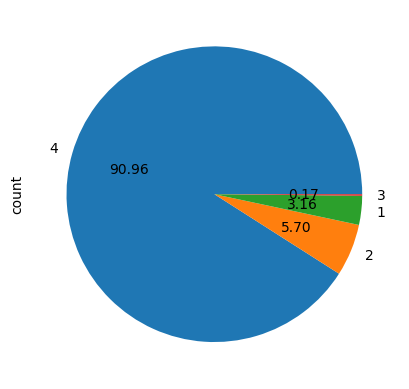

In [26]:
#dataset.rename(columns = {'No_':'SKU'}, inplace = True)
dataset['QC_CAT'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
dataset['SKU'].value_counts()

ACBNRC51BE10003    1
FNTBST41CW30184    1
FNTBCF11TK15326    1
FNTBCF12NA15309    1
FNTBCF12WA15281    1
                  ..
FNSF51CFCO30321    1
FNSF51CFCO33211    1
FNSF51CFCU30001    1
FNSF51CFCU30002    1
VDWDWP85GD19901    1
Name: SKU, Length: 9263, dtype: int64

In [27]:
dataset.rename(columns={'Final Move': 'Final_Move'}, inplace=True)

In [ ]:
#SKU = pd.get_dummies(dataset['SKU'], drop_first = True)
#SKU.head()

In [ ]:
#dataset = pd.concat([SKU,dataset],axis=1)
#dataset.head(5)

In [28]:
dataset.drop(['SKU','Ecosystem', 'Description','Default  QC CAT.','Delivery Check','Reject Check','Default Move','Current Move','Int. Move','Doorstep Replacements %','Doorstep Repairs %','FC/DC Rejects %','Movement'], axis=1, inplace=True)


In [29]:
dataset['Final_Move'].value_counts()

Final_Move
A     4431
A+    4044
C      659
B      129
Name: count, dtype: int64

In [30]:
Final_Move = {'A+':4,
            'A':3,
            'B':2,
            'C':1,
            'D':1}
# apply using map
dataset['Final_Move'] = dataset.Final_Move.map(Final_Move)

In [31]:
dataset.shape

(9263, 6)

In [32]:
dataset.head(5)

,QC_CAT,Delivered,Doorstep Replacements,Doorstep Repairs,FC/DC Rejects,Final_Move
0,2,40,0,0,0,3
1,4,3,0,0,0,4
2,4,18,0,0,0,4
3,4,154,0,0,0,4
4,4,58,0,0,0,4


TRAIN_TEST SPLIT

In [33]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


LOGISTIC REGRESSION

In [ ]:

#model = LogisticRegression()

In [ ]:
#model.fit(X_train,y_train)

In [ ]:
#print("Accuracy:", model.score(X_test,y_test)) = 95.42%

SUPPORT VECTOR MACHINE

In [ ]:
#model = svm.SVC()

In [ ]:
#model.fit(X_train,y_train)


In [ ]:
#print("Accuracy:", model.score(X_test,y_test)) = 87.3%

In [35]:
model = DecisionTreeClassifier()

In [36]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#model.fit(X,y)

In [37]:
print("Accuracy:", model.score(X_test,y_test))

Accuracy: 0.9964015833033465


In [38]:
from sklearn.model_selection import cross_val_score
print("Scores:",cross_val_score(model,X_train,y_train, cv=100, scoring='accuracy').mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 89 members, which is less than n_splits=100.
  warnings.warn(


Scores: 0.9972187499999999


CONFUSION MATRIX

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [42]:
model.classes_

array([1, 2, 3, 4])

In [44]:
Y = model.predict(X_test)

In [45]:
cm = confusion_matrix(y_test,Y,labels=model.classes_)
print(cm)

[[ 195    2    4    0]
 [   0   40    0    0]
 [   1    0 1315    0]
 [   0    1    2 1219]]


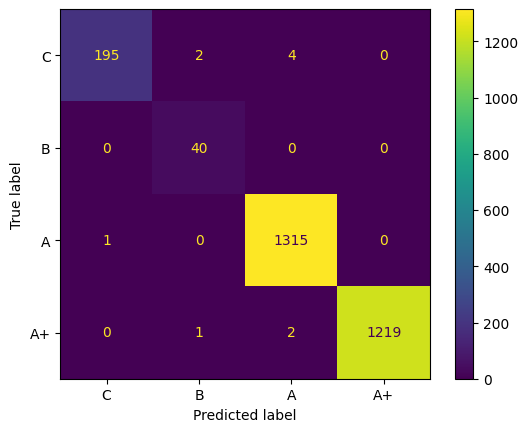

In [46]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['C','B','A','A+'])
cm_disp.plot()

SAVE THE MODEL

In [ ]:
import pickle
with open ('model_pickle','wb') as f:
 pickle.dump(model,f)